In [10]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Set the maximum column width to ensure complete values are shown
pd.set_option('display.max_rows', None)

# Set the maximum column width to ensure complete values are shown
pd.set_option('display.max_columns', None)

# Set the maximum column width to ensure complete values are shown
pd.set_option('display.max_colwidth', None)

In [11]:
records_to_load = 4000
df = pd.read_csv('all_campsite_data.csv', nrows=records_to_load)
# Initial Data Inspection
print("First few rows of the dataset:")
df.head(n=5)

First few rows of the dataset:


,Unnamed: 0,campsite id,campsite name,facilities,region name,Country Name,latitude,longitude,star rating,total pitches,websiteID,providerID,active
0,0,100009,Oostappen Park Blauwe Meer,"Groceries: extensive selection,Snack bar,Takeaway meals,Restaurant (with ample choice),Entertainment for children up to 12 years (min. twice a week),Games room,Television,Sauna,Children's playground: small,Children's playground: large,Multi-sports field,Crazy golf,Table tennis table,Languages spoken at reception (during the high season),Reservation recommended for high season,Euro-plug required,Motorhomes allowed,Special facilities for motorhomes,Footpaths and roads are lit,Patrolled grounds,Quiet during the night,Public transport near the campsite (max. 0.5 km),Grass,Sand,Marked pitches,Unshaded pitches,Pitches with some shade,Pitches with plenty of shade,Bungalows/chalets,Tents,Pedal boats,Bicycles,Washbasins: cold water,Washbasins: hot water,Individual washcabins: cold water,Individual washcabins: hot water,Showers: cold water,Showers: hot water,Standard toilets,Chemical toilet disposal point,Baby room,Washing up sinks: cold water,Washing up sinks: hot water,Laundry sinks: cold water,Laundry sinks: hot water,Washing machine(s),Dryers,Ironing facilities,Indoor swimming pool (heated),Toddlers' pool (ages 1-3, < 40 cm),Water slide (> 10 m),Sandy beach,Fishing,Credit cards accepted,Located by a lake/recreation pond (max. 0.1 km),Static caravans,Cafe/Bar,Pitches with radio and television connections,Shopping opportunities in the vicinity (< 10 km),A shower (150 cmsx150 cms minimum) and a toilet (165x220cms or 190cmsx190cms minimum),Disabled sanitary facilities on one level or accessible via a ramp,Width of door 100 cms minimum,Foldaway/lockable supports on at least 1 side of the toilet,Height toilet-seat approx. 48 cms,Next to toilet on at least one side approx. 90cms room to manoeuvre,In front of toilet at least 120 cms room to manoeuvre,No threshold of over 2cms high in sanitary block,Width of corridor in sanitary block 120 cms minimum,Washing and toilet facilities for disabled people in the same building as for the other campers,Shower seat / shower chair (folding or mobile) approximately 48 cm high,Canteen/restaurant with level entrance or with ramp,Cafeteria/restaurant has an accessible and adapted toilet for the disabled,Shop/supermarket with level entrance or with ramp,Toilet-shower combination (215cmsx215cms minimum),Tents allowed,Caravans allowed,Located in a wood,Dog walking area,Freezing for cooling elements,Mini club (at least 4x a week - high season),Dance nights,Golf course nearby (max. 10 km),Heated sanitary facilities,Waste water drainage at/near the pitch (max. 15 m),Tap at/near the pitch (max. 50 m),Go-kart,Electrical hook-up optional,Cash dispenser/cashback possible,Marked out walking routes near the campsite,Cycle routes starting at the campsite,Microwave,Bouncy castle,Wifi zone,Tap without push control,Small extra tent permitted,Whirlpool,Steam bath,Indoor playground,Toilet paper provided,Also suitable for caravans > 5.5m, excluding towbar,Also suitable for motorhomes > 8m and > 4,000 kg,Fresh bread available at the campsite,Reservation with CampingCard ACSI possible,Payment by debit card/Maestro possible,Dog(s) in low season (on lead),Dog(s) in high season (on lead),Water play area,Defibrillator,Entertainment for adults (at least 2x a week),ACSI Club ID is accepted as an identity document,Reception easily accessible for the disabled,Disabled sanitary facilities only open for the disabled,Twin-axle vehicles permitted,Entertainment for children from 13 to 18 years (at least 2x a week),Campsite info app,Mobile internet,Mountain bike routes at the campsite,Bungalowtenten,POD’s,Water tanken,Grijs water lozen,Elektrische aansluiting mogelijk,Service voor passanten",Provincie Limburg,Belgium,51.19425,5.30367,*****,1350,7.0,3.0,0.0
1,1,100010,Camping GT Keiheuvel,"Car-free pitches,Barbecues permitted (charcoal-gas-electricity),Snack

In [17]:
print("\nData types of each column:")
print(df.dtypes)
df.columns


Data types of each column:
campsite name     object
facilities        object
region name       object
Country Name      object
latitude         float64
longitude        float64
star rating       object
total pitches      int64
active           float64
dtype: object


Index(['campsite name', 'facilities', 'region name', 'Country Name',
       'latitude', 'longitude', 'star rating', 'total pitches', 'active'],
      dtype='object')

In [4]:
# # column based operations
# df.rename(columns={'campsite id': 'campsite_id', 
#                    'campsite name': 'campsite_name',
#                    'region name': 'region_name', 
#                    'Country Name': 'country_name',
#                    'star rating': 'rating',
#                    'total pitches': 'total_pitches',
#                    'websiteID': 'website_id',
#                    'providerID': 'provider_id',
#                    'active': 'is_active'
#                   }, inplace=True
#          )

In [16]:
df.drop(columns=['Unnamed: 0', 'campsite id', 'websiteID', 'providerID'], inplace=True)

In [7]:
# Check if "campingcard accepted" is present in the "facilities" column
df['campingcard_accepted'] = df['facilities'].str.contains('Reservation with CampingCard ACSI possible', case=False)

# Check if "Dog(s) in low season (on lead)" is present in the "facilities" column
df['dog_in_low_season'] = df['facilities'].str.contains('Dog\(s\) in low season \(on lead\)', case=False, regex=True)

# Check if "Dog(s) in high season (on lead)" is present in the "facilities" column
df['dog_in_high_season'] = df['facilities'].str.contains('Dog\(s\) in high season \(on lead\)', case=False, regex=True)

# Convert 0.0 to False and 1.0 to True
df['is_active'] = df['active'].astype(bool)

In [9]:
# Handle null values
df.fillna({'region name': 'Unknown', 'facilities': 'Unknown', 'star rating': 0,
           'dog_in_low_season': 'Unknown', 'dog_in_high_season': 'Unknown',
           'is_active': 'Unknown', 'total pitches': 0, 'campingcard_accepted': 'Unknown'}, inplace=True)
df.to_csv('power_bi_campsites.csv', index=False)

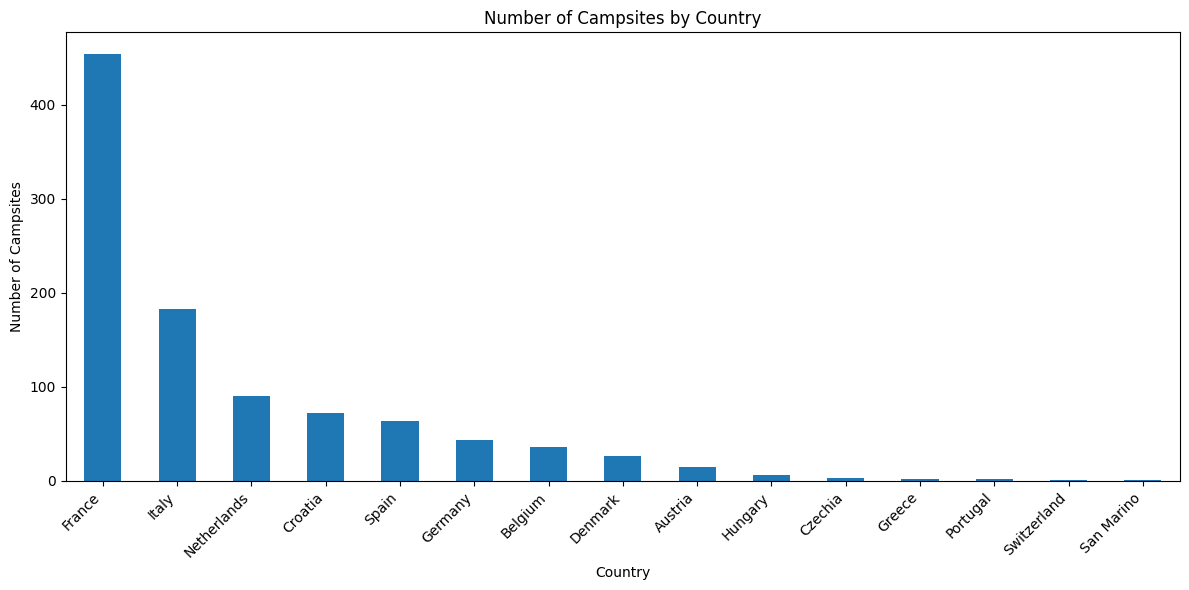

In [23]:
# Count campsites by country
campsite_counts_by_country = df['Country Name'].value_counts()

# Plot the distribution of campsites by country
plt.figure(figsize=(12, 6))
campsite_counts_by_country.plot(kind='bar')
plt.title('Number of Campsites by Country')
plt.xlabel('Country')
plt.ylabel('Number of Campsites')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

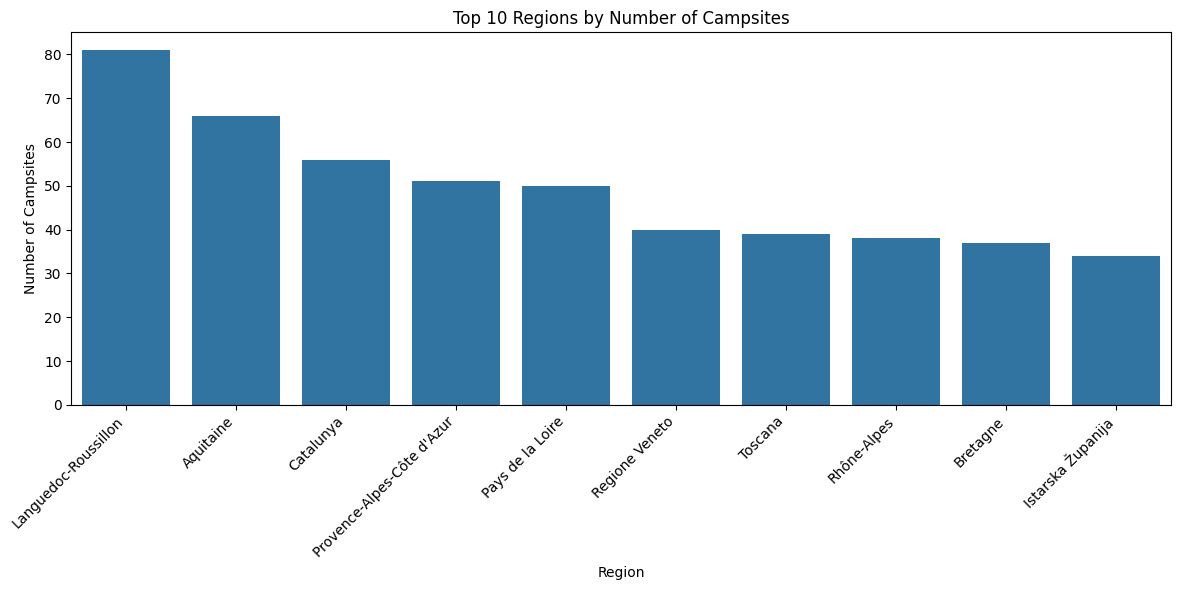

In [16]:
# Distribution of Campsites
plt.figure(figsize=(12, 6))  # Increase figure width
sns.countplot(data=df, x='region name', order=df['region name'].value_counts().index[:10])
plt.title('Top 10 Regions by Number of Campsites')
plt.xlabel('Region')
plt.ylabel('Number of Campsites')
plt.xticks(rotation=45, ha='right')  # Align x-axis labels to the right
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

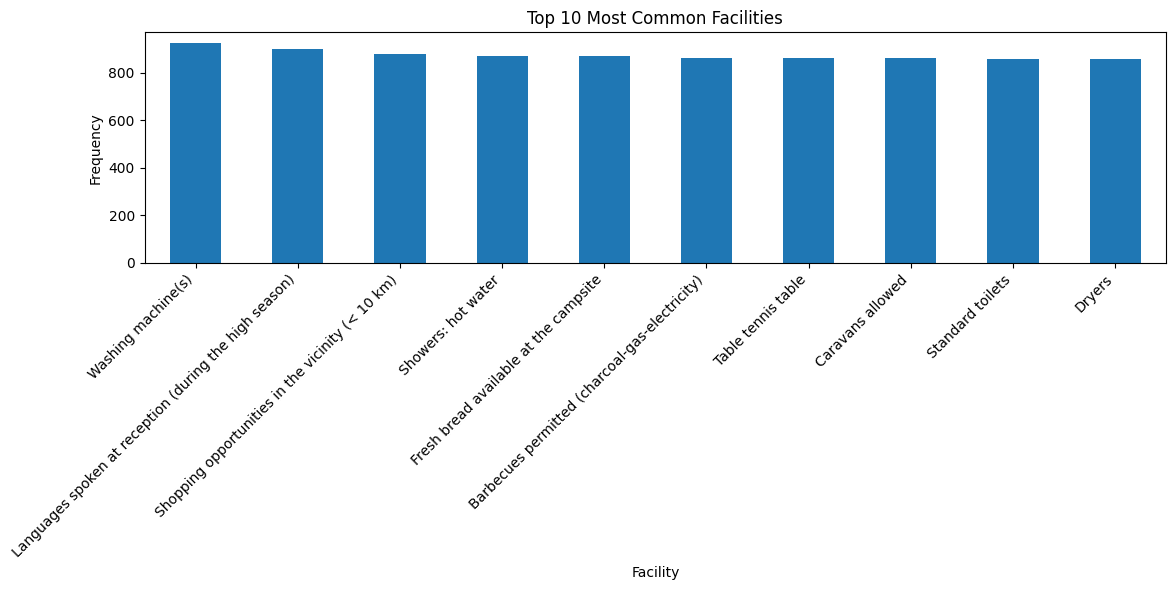

In [17]:
# Facilities Analysis
plt.figure(figsize=(12, 6))  # Increase figure width
facility_counts = facilities.value_counts().nlargest(10)
facility_counts.plot(kind='bar')
plt.title('Top 10 Most Common Facilities')
plt.xlabel('Facility')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Align x-axis labels to the right
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

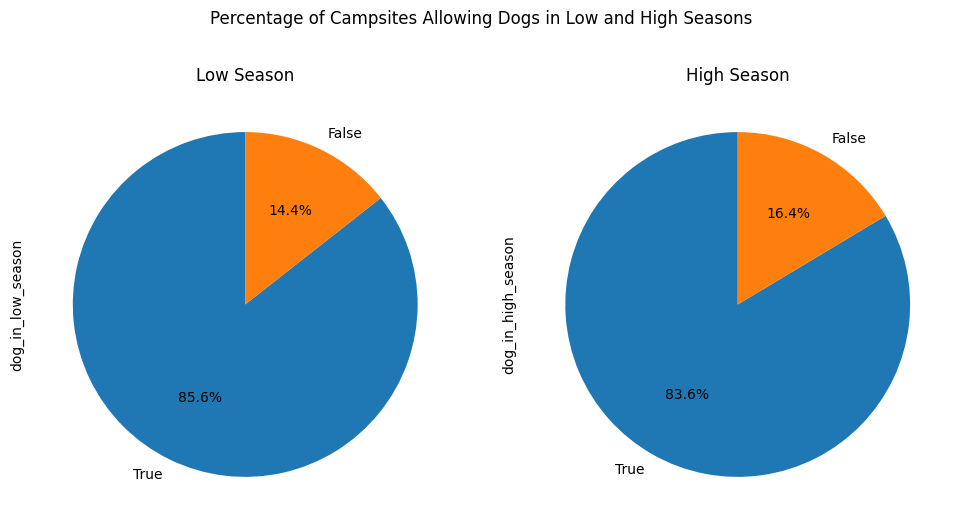

In [21]:
# Seasonal Dog Policies
dog_policies = df[['dog_in_low_season', 'dog_in_high_season']].apply(pd.Series.value_counts, normalize=True) * 100

plt.figure(figsize=(10, 5))

# Plot pie chart for low season
plt.subplot(1, 2, 1)
dog_policies['dog_in_low_season'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Low Season')

# Plot pie chart for high season
plt.subplot(1, 2, 2)
dog_policies['dog_in_high_season'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('High Season')

plt.suptitle('Percentage of Campsites Allowing Dogs in Low and High Seasons', y=1.05)
plt.tight_layout()
plt.show()

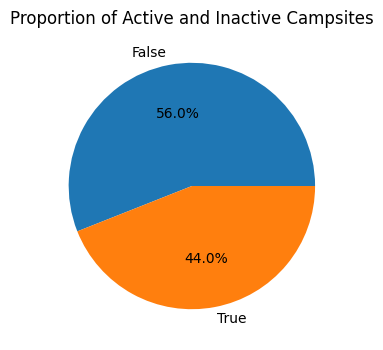

In [12]:
# Active Campsites
plt.figure(figsize=(6, 4))
df['is_active'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Active and Inactive Campsites')
plt.ylabel('')
plt.show()

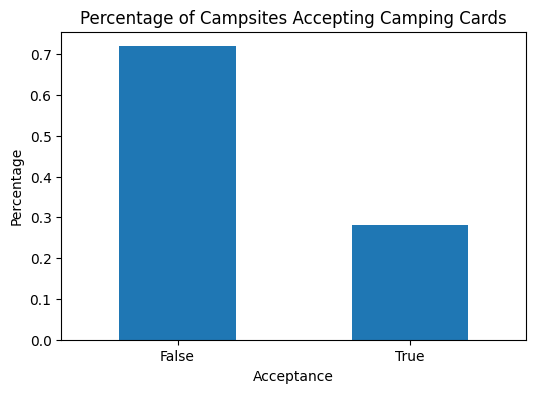

In [14]:
# Camping Card Acceptance
plt.figure(figsize=(6, 4))
df['campingcard_accepted'].value_counts(normalize=True).plot(kind='bar')
plt.title('Percentage of Campsites Accepting Camping Cards')
plt.xlabel('Acceptance')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

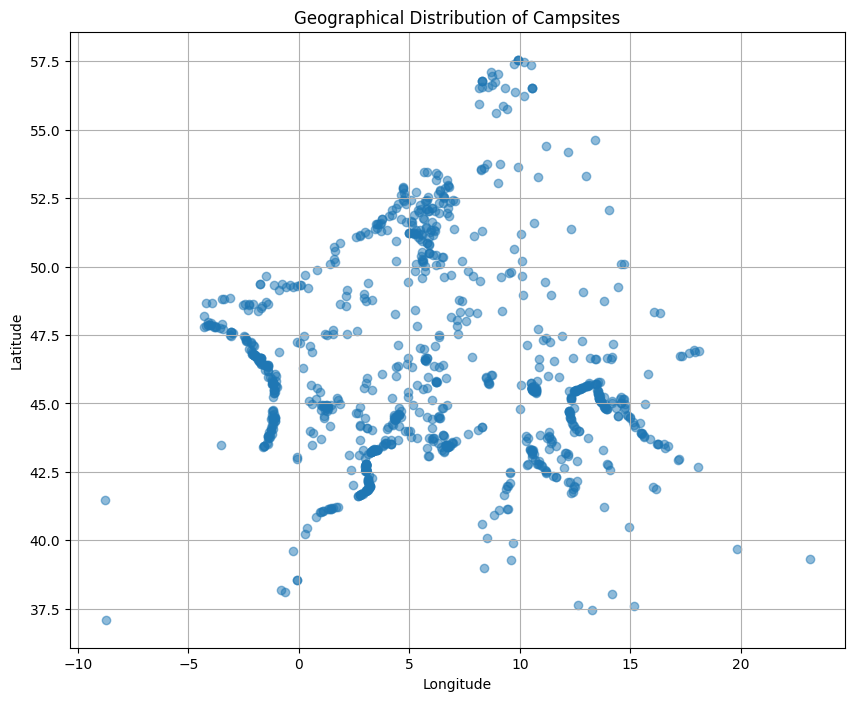

In [25]:
# Geospatial Analysis
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5)
plt.title('Geographical Distribution of Campsites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()